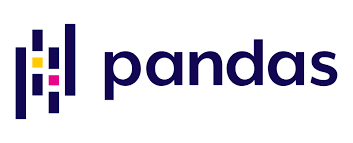

## [45] Memadukan loc dan iloc untuk melakukan seleksi data

### [45.1] Import Module

In [8]:
import pandas as pd
print(pd.__version__)

1.0.5


### [45.2] Persiapan Data Frame

In [9]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### [45.3] Memadukan loc dan iloc untuk melakukan seleksi data
- Parameter loc dan iloc terdiri dari sisi sebelah kiri yang berkorelasi dengan baris dan sebelah kanan yang berkorelasi dengan kolom
- Pada perpaduan loc dan iloc untuk menyeleksi data , penyeleksian baris dilakukan oleh iloc dan penyeleksian kolom dilakukan oleh loc
- Sebagai catatan, urutan pemanggilan loc dan iloc tidak mempengaruhi hasil

In [10]:
df.iloc[15:20,:].loc[:,'name':'age']

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


In [11]:
df.loc[:,'name':'age'].iloc[15:20,:]

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


## [46] Seleksi weekdays dan weekends pada data deret waktu (time series) data

### [46.1] Import Module

In [12]:
import pandas as pd
import numpy as np
import pandas.util.testing

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


<ipython-input-12-6f70ad61579f>:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


### [46.2] Persiapan Data Frame
- Data frame terdiri dari 2 kolom dan 365 baris yang terdiri dari angka acak dimulai dari 1-20

In [13]:
n_rows = 365
n_cols = 2
cols = ['col1','col2']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)

df.index = pd.util.testing.makeDateIndex(n_rows,freq='D')
df

,col1,col2
2000-01-01,10,2
2000-01-02,8,13
2000-01-03,7,18
2000-01-04,17,18
2000-01-05,10,7
...,...,...
2000-12-26,11,8
2000-12-27,13,5
2000-12-28,11,3
2000-12-29,10,5


### [46.3] Seleksi weekdays dan weekends
- Seleksi pertama digunakan untuk mengetahui tanggal-tanggal yang berada pada weekdays 
- Seleksi kedua digunakan untuk mengetahui tanggal-tanggal yang berada pada weekend 
- Dengan seleksi sbb, akan mudah mengetahui hari pada dataset time series (misalnya : tanggal 7 januari adalah hari jumat)

In [14]:
weekdays_df = df[df.index.dayofweek.isin([0,1,2,3,4])]
weekdays_df.head(7)

,col1,col2
2000-01-03,7,18
2000-01-04,17,18
2000-01-05,10,7
2000-01-06,7,16
2000-01-07,4,4
2000-01-10,3,7
2000-01-11,12,9


In [15]:
weekdays_df = df[df.index.dayofweek.isin([5,6])]
weekdays_df.head(7)

,col1,col2
2000-01-01,10,2
2000-01-02,8,13
2000-01-08,9,6
2000-01-09,5,12
2000-01-15,3,2
2000-01-16,17,18
2000-01-22,6,17


## [47] Deteksi dan penanganan kolom dengan tipe data beragam (mixed data type)

### [47.1] Import Module

In [16]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)

1.0.5
1.18.5


### [47.2] Persiapan Data Frame
- Data frame yang dibentuk adalah data frame dengan dua kolom (kolom nama dan ipk)
- Pada kolom IPK, tipe data yang mengisi dataframe sangat beragam (integer, string, hingga tipe floating point)

In [17]:
d = {'nama':['bejo','tejo','wati','tiwi','cecep'],
    'ipk':[2,'3',3,2.75,'3.25']}
df = pd.DataFrame(d)
df

,nama,ipk
0,bejo,2
1,tejo,3
2,wati,3
3,tiwi,2.75
4,cecep,3.25


### [47.3] Deteksi dan Penanganan Kolom Dengan Tipe Data Beragam
- Langkah awal adalah untuk mencari tipe data pada kolom nama dan ipk yaitu "object" yang seringkali berkorelasi dengan type data String
- Untuk mencari tahu mixed data type di kolom IPK, makan dilakukan pemanggilan .apply(type) di kolom IPK
- Untuk membuat summary terkait dari data type pada kolom di data frame dilakukan pemanggilan fungsi .value_counts()

In [18]:
df.dtypes

nama    object
ipk     object
dtype: object

In [19]:
df['ipk'].apply(type)

0      <class 'int'>
1      <class 'str'>
2      <class 'int'>
3    <class 'float'>
4      <class 'str'>
Name: ipk, dtype: object

In [20]:
df['ipk'].apply(type).value_counts()

<class 'str'>      2
<class 'int'>      2
<class 'float'>    1
Name: ipk, dtype: int64

In [21]:
df['ipk'] = df['ipk'].astype(float)

In [22]:
df['ipk'].apply(type).value_counts()

<class 'float'>    5
Name: ipk, dtype: int64

## [48] Cummulative Count pada Data Frame

### [48.1] Import Module

In [23]:
import pandas as pd
print(pd.__version__)

1.0.5


### [48.2] Persiapan Data Frame

In [24]:
d = {'penjual':['bejo','tejo','wati','bejo','cecep','tejo','wati','bejo'],
    'barang':['monitor','monitor','keyboard','mouse','keyboard','monitor','laptop','monitor']}
df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,wati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,wati,laptop
7,bejo,monitor


### [48.3] Mengenal Cummulative Count dengan CumCount()
- Pada ln 26, data pada dataframe dikelompokan berdasarkan penjual lalu dikenakan fungsi cumcount()

In [26]:
df['count_tiap_penjual'] = df.groupby('penjual').cumcount()+1
df

,penjual,barang,count_tiap_penjual
0,bejo,monitor,1
1,tejo,monitor,1
2,wati,keyboard,1
3,bejo,mouse,2
4,cecep,keyboard,1
5,tejo,monitor,2
6,wati,laptop,2
7,bejo,monitor,3


In [27]:
df['count_tiap_barang'] = df.groupby('barang').cumcount()+1
df

,penjual,barang,count_tiap_penjual
0,bejo,monitor,1
1,tejo,monitor,2
2,wati,keyboard,1
3,bejo,mouse,1
4,cecep,keyboard,2
5,tejo,monitor,3
6,wati,laptop,1
7,bejo,monitor,4


In [28]:
df['count_pasangan_kolom'] = df.groupby(['penjual','barang']).cumcount()+1
df

,penjual,barang,count_tiap_penjual,count_pasangan_kolom
0,bejo,monitor,1,1
1,tejo,monitor,2,1
2,wati,keyboard,1,1
3,bejo,mouse,1,1
4,cecep,keyboard,2,1
5,tejo,monitor,3,2
6,wati,laptop,1,1
7,bejo,monitor,4,2
